In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rand
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
def is_metric(G):
    shortest = dict(nx.floyd_warshall(G))
    for u, v, datadict in G.edges(data=True):
        if abs(shortest[u][v] - datadict['weight']) >= 0.00001:
            return False
    return True


def drawVertices(G,x):
    for i in range(x):
        G.add_node(i)
    return


def drawEdges(G,percentage):
    nodes = G.nodes()
    lim = 1/percentage
    for n in nodes:
        for m in nodes:
            if n != m:
                a = rand.randint(1,lim)
                if n != m and a == 1:
                    G.add_edge(n,m)     
    return



def drawEdgesConnected(G,perc):
    drawEdges(G,perc)
    ensureAllConnected(G)
    return


def ensureAllConnected(G):
    nodes = G.nodes()
    while not nx.is_connected(G):
        n = rand.randint(1,len(nodes) -1)
        m = rand.randint(1,len(nodes) -1)
        while m in nx.node_connected_component(G,n):
            m = rand.randint(1,len(nodes) -1)
        G.add_edge(n,m)
    return
 
    
def selectRandPartner(G,n):
    m = n
    nodes = G.nodes()
    while (m == n):
        m = rand.randint(1, len(nodes)-1)
        print(m)
    return m


def generateRandomMetricGraph(N, per):
    V = N # number of nodes
    D = 2 # dimensionality

    positions = 10*np.random.rand(V, D)
    differences = positions[:, None, :] - positions[None, :, :]
    distances = np.sqrt(np.sum(differences**2, axis=-1)) # euclidean
    # create a weighted, directed graph in networkx
    graph = nx.from_numpy_matrix(distances, create_using=nx.Graph())
    nodes = graph.nodes()
    np.random.seed(1)
    for n in nodes:
        for m in nodes:
            if n != m and graph.has_edge(n,m):
                num = np.random.randint(low = 1, high = 1000, size = 1)
                if (num/1000) > per:
                    graph.remove_edge(n,m)
                    if not nx.is_connected(graph):
                        graph.add_edge(n,m, weight = distances[n][m])
    return graph






def printNodes(G):
    nodes = G.nodes()
    for n in nodes:
        print(n,end = " ")
    print()
    return;


def selectNumTAs(G):
    nodes = G.nodes()
    np.random.seed(1)
    if (len(nodes) < 50):
        #do stuff
        numTAs = np.random.randint(low = 5, high = min(22,len(nodes) - 4), size = 1)
    elif (len(nodes) < 100):
        #do stuff
        numTAs = np.random.randint(low = 25, high = min(45,len(nodes) - 8), size = 1)
    else:
        #do stuff
        numTAs = np.random.randint(low = 50, high = min(90,len(nodes) - 10), size = 1)
    return numTAs[0]
    


def selectTAs(G,numTAs):
    taHomes = np.random.randint(low = 1, high = len(G.nodes())-1, size = numTAs)
    for i in taHomes:
        print(i, end = " ")
    print()
        
        
    

def printAdjacencyMatrix(G):
    nodes = G.nodes()
    for n in nodes:
        for m in nodes:
            if (G.has_edge(n,m)):
                print(G[n][m]['weight'],end = " ")
            else:
                print('x', end = " ")
        print()
    return


def createOutput(G):
    print(len(G.nodes))
    numTAs = selectNumTAs(G)
    print(numTAs)
    printNodes(G)
    selectTAs(G,numTAs)
    printAdjacencyMatrix(G)




In [3]:


G = nx.Graph()
drawVertices(G,20)
drawEdgesConnected(G,0.1)

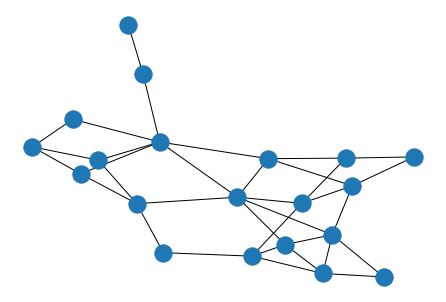

In [4]:
nx.draw(G)

In [5]:
#G2 = nx.random_geometric_graph(20, 0.1)
#nx.draw(G2)

True
True
656


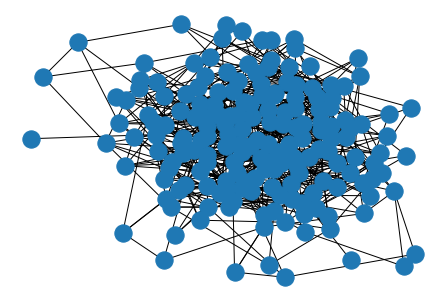

In [6]:


G = generateRandomMetricGraph(180,0.2)
nx.draw(G)
print(is_metric(G))
print(nx.is_connected(G))
print(len(G.edges()))


In [7]:
createOutput(G)

180
87
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 
141 73 138 134 80 145 130 72 135 26 21 102 147 140 157 158 143 51 69 97 87 142 138 8 64 62 23 58 2 129 61 9 142 116 176 122 31 72 132 150 50 58 4 25 44 77 27 53 81 110 116 42 16 65 26 112 136 27 154 105 23 10 127 24 126 101 156 166 58 84 167 137 33 163 11 24 144 88 26 93 75 47 161 152 66 114 78 
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 0

x x x x 2.971823961187745 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 6.37673211489587 x x 7.024812311540609 x x 5.377114485679037 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 
x x x x x x x 6.092659046859457 x x x x x x x x x x x x 4.320451117093645 x x x x x x x x x x x x x x x 2.140306019574663 x 5.797496377730805 x x x x 3.905932374551363 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.625010010374193 x x x x x x x x x x x x x x x x x x x x x x x x x x 2.561450612708805 x x x x x x x x x x x x x x x x x 4.727992590369519 x x x x x x x x x x x x x x x x x x x x x x x 6.493520151152299 x x x x x x x x x x x x x x x x x x 4.1348910414762265 x x x x x x x x x 
x x x x x x x x x 1.7432056983095618 x x x x x x 5.217

x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 6.0427043062333174 x x x x x x x x x x x x x x x x x 4.073552656731422 5.935286950049629 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 1.441122896028756 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 4.746252417370799 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.412138710873237 x x x x x x x x x x x x x x x x x 4.073552656731422 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.020257528944728 x x x x x x x x 4.007686281678736 x x x x x 2.9291659615911887 x x x x x x x x x x x x x x x x x x x x x x x x 5.845773037354371 x x x x x 3.060551047921648 x x x x x x x x x x x x x x x x x x x x x x x x x x x x 4.109196962458646 x x x x x x x x x x x x x x 5.800000618522038 x x x x 
x x x x 6.6692756003207325 x x x x x x 4.99583260441

x x x x x x 1.4497196528328313 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.818754805711413 x x x x x x x x x x x x x x x x x x x x x x x x 4.199043214515351 x x x x x x x x x x x x x x x x 3.374677252459371 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.2737859150927022 x x x x x x x x 4.690257422548708 x x x x x x x x x x x x x x x x x x x x x x 
x x x x x x x x x x x x x x x x x x x x x x x x x x 6.803197472099711 x 3.3176645926812665 x x x x 8.410333071206356 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 3.863881011434308 x x x x x x x x x x x x x x x x x x x 7.865773291080296 7.553995014687064 x x x x x x x 3.329492055065414 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.216776897329682 x x 6.724246056354518 x x x x x x x x x x x x x x x 7.029941333938112 x x 
x x x x x x 2.83187

x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.5838920983075395 x x 8.294744328986965 x x x x x x x x 4.007686281678736 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.3728312636365074 x x x x 2.6524191068053864 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.70053110414773 x x 7.265800266919424 x x x x x x x x x x x x x 
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 4.8312147752647965 x x x x x x x x x x x x x x x x 4.352156580377357 x x x x x x x x 5.139499345345325 5.754402533750564 x x x x x x x x x x x 6.52118851708115 x x x x x x x x x x x x x x x x x x x 5.376850203111525 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.6395319379707476 x x x x x x x x x x x x x x x x 4.487963001236398 x x x x x x x x x 3.4270784758110997 x x x x x x x x x x x x x x x 
x x x x x x x x x 

x x x x x x x x x x x x x x x x x x x x x x x x x 2.3796262785383995 x x x x x x x x x x x x x x x 6.411851073705534 x x x x x x x 3.7477065144436623 x x x x x x x x x x x x x x x x x x x 7.998300475954578 x x x x x x x x x x x x x x x x x x x 6.036897765477858 x x x x x x x x x x x x x x x x x x x x x x x x x 8.202536498075418 x x x 6.182759766392828 x x x x x x x x x x x 1.9921492059745198 x x x 7.2492562247107815 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 
x x x x x x x x x x x x x x x x x x x x x x x x x x 5.783875045179522 x x x x x x x x x x 1.892623963254034 x x x x x x x x x x x x x x x x x x x x x x x x x 3.6817133416521077 1.6806196628975094 x x x x x x x x x x 3.486093249749962 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.1768794412723884 x x x 8.402438088764724 x x x x 6.560671769253464 x x 7.319204643739672 1.605057610888814 x x x 

x x x x x x x x x x x x x x x x x 5.7335012952949675 x x x x x x x 4.104878332164542 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 1.7989624690566628 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 1.8492893760249844 x x x x x x x x x x 2.8597796400451867 x x x x 6.261082450213678 x x x x x x x x x x x x x x x 1.1813992276974528 x x x x x x x x x x x x x x x x 0.7763314134655807 x x x x x x x x x x x x x x x x x x x x x x x 0.6181201879838643 x x x x x x x 
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 4.041876423653778 x x x x x x x x x x x x x 6.171091739767513 x x x x x x x x x x x 5.040267663551945 x x x x x x x x x x x x x x x 0.4082748475248229 x x 0.7259048884961268 x x x x x x x x x x 1.9775171658011228 x x x x x x x x x x x x x x x x x x x x x x x x x x x 2.1768794412723884 x x x x x x 7.041888418667893 x x x x x x x 3.468789050115246 x x x x x x x x x x x x x x x x x x x x x x x x x x x x 11.2328309

x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 3.2900367560764976 x x x x x x x x 3.9857097602628864 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.959086152874039 x x x x x x x x x x x x x x x x x x x x x x x x x x 0.6181201879838643 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 3.0633438668594515 x x x 2.0675973508777337 x x x x x x x x x x x x 5.850660176427688 x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x 5.631222619893172 x x x x x x x x x x x x x x x x x x x x x x x 6.45988284116527 x x x x x x x x x x x x x x x x x x x x 1.738833642741187 x x x x x 
x x x x x x x x x x x x 6.832969489002314 x x x x x x x x x x x x 6.7483593749764275 x x x x x x x x 3.92399994018